## Challenge 2: Seasonality
### By: Kaushal Bhingaradia
### Date: 2025-11-22

## First, let's import the necessary libraries.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

## Next load the dataset

In [39]:
print("Loading Data.... (This may take a while)")
data = pd.read_csv('~/Downloads/seasonality.csv')
print('\nDone Loading!')
data.head()

Loading Data.... (This may take a while)

Done Loading!


,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,...,question_user_country_code,question_user_gender,question_user_dob,question_user_created_at,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at
0,3849056,519124,nyn,E ABA WEFARM OFFICES ZABO NIZISHANGWA NKAHI?,NaN,2017-11-22 12:25:03+00,20691011,200868,nyn,E!23 Omubazi Ni Dudu Cipa',...,ug,NaN,NaN,2017-11-18 13:09:11+00,farmer,live,ug,NaN,NaN,2017-05-09 09:19:33+00
1,3849061,521327,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00,4334249,526113,eng,Q1 which stage is marleks last vaccinated,...,ug,NaN,NaN,2017-11-20 11:55:48+00,farmer,zombie,ug,NaN,NaN,2017-11-22 10:13:03+00
2,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00
3,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00
4,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cat,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00


## Exploring the initial data

The data has already been loaded in the previous step. Let's check the shape, column names and data types,  missing values, unique values, and describe.

In [40]:
print("Data Shape:\n")
display(data.shape)
print("\n=======================================\n")
print("\nData Info:\n")
display(data.info())
print("\n=======================================\n")
print("\n Missing Data:\n")
display(data.isna().sum())
print("\n=======================================\n")
print("\nUnique Values:\n")
display(data.nunique())
print("\n=======================================\n")
print("\nDescribe Data:\n")
display(data.describe())

Data Shape:



(20304843, 24)




Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20304843 entries, 0 to 20304842
Data columns (total 24 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   question_id                 int64 
 1   question_user_id            int64 
 2   question_language           object
 3   question_content            object
 4   question_topic              object
 5   question_sent               object
 6   response_id                 int64 
 7   response_user_id            int64 
 8   response_language           object
 9   response_content            object
 10  response_topic              object
 11  response_sent               object
 12  question_user_type          object
 13  question_user_status        object
 14  question_user_country_code  object
 15  question_user_gender        object
 16  question_user_dob           object
 17  question_user_created_at    object
 18  response_user_type          object
 19  response_user_status     

None




 Missing Data:



question_id                          0
question_user_id                     0
question_language                    0
question_content                     0
question_topic                 3537729
question_sent                        0
response_id                          0
response_user_id                     0
response_language                    0
response_content                     0
response_topic                13835556
response_sent                        0
question_user_type                   0
question_user_status                 0
question_user_country_code           0
question_user_gender          19713950
question_user_dob             19073559
question_user_created_at             0
response_user_type                   0
response_user_status                 0
response_user_country_code           0
response_user_gender          19339833
response_user_dob             18640155
response_user_created_at             0
dtype: int64




Unique Values:



question_id                    5865819
question_user_id               1026367
question_language                    4
question_content               5452290
question_topic                     148
question_sent                  5862139
response_id                   16283143
response_user_id                960431
response_language                    5
response_content              15282991
response_topic                     150
response_sent                 16270184
question_user_type                   1
question_user_status                 4
question_user_country_code           4
question_user_gender                 2
question_user_dob                13347
question_user_created_at       1017289
response_user_type                   1
response_user_status                 4
response_user_country_code           4
response_user_gender                 2
response_user_dob                14660
response_user_created_at        947681
dtype: int64




Describe Data:



,question_id,question_user_id,response_id,response_user_id
count,2.030484e+07,2.030484e+07,2.030484e+07,2.030484e+07
mean,3.063880e+07,1.833289e+06,3.086022e+07,1.629548e+06
std,1.635694e+07,1.058127e+06,1.636177e+07,1.047366e+06
min,3.849056e+06,7.000000e+00,3.849209e+06,7.000000e+00
25%,1.612385e+07,9.801100e+05,1.634213e+07,7.970650e+05
50%,2.919434e+07,1.753870e+06,2.948176e+07,1.383485e+06
75%,4.552916e+07,2.805610e+06,4.579527e+07,2.468823e+06
max,5.926151e+07,3.833007e+06,5.926235e+07,3.832167e+06


## Data Preprocessing

We need to convert the `question_sent` column to datetime objects to extract seasonal information. We will also extract the Month and Year.

In [41]:
# Convert question_sent to datetime
data['question_sent'] = pd.to_datetime(data['question_sent'], errors='coerce')

# Drop rows with invalid dates
data = data.dropna(subset=['question_sent'])

# Extract Month and Year
data['month'] = data['question_sent'].dt.month
data['year'] = data['question_sent'].dt.year
data['month_name'] = data['question_sent'].dt.month_name()
data['day_of_year'] = data['question_sent'].dt.dayofyear

# Check the range of dates
print(f"Date Range: {data['question_sent'].min()} to {data['question_sent'].max()}")
data.head()

Date Range: 2017-11-22 12:25:03+00:00 to 2021-01-17 06:12:14+00:00


,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,...,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at,month,year,month_name,day_of_year
0,3849056,519124,nyn,E ABA WEFARM OFFICES ZABO NIZISHANGWA NKAHI?,NaN,2017-11-22 12:25:03+00:00,20691011,200868,nyn,E!23 Omubazi Ni Dudu Cipa',...,farmer,live,ug,NaN,NaN,2017-05-09 09:19:33+00,11,2017,November,326
1,3849061,521327,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00:00,4334249,526113,eng,Q1 which stage is marleks last vaccinated,...,farmer,zombie,ug,NaN,NaN,2017-11-22 10:13:03+00,11,2017,November,326
2,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00:00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00,11,2017,November,326
3,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00:00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00,11,2017,November,326
4,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cat,2017-11-22 12:25:08+00:00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,...,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00,11,2017,November,326


## Seasonality Analysis

### 1. Monthly Trends of Question Volume
Let's see how the number of questions fluctuates by month.

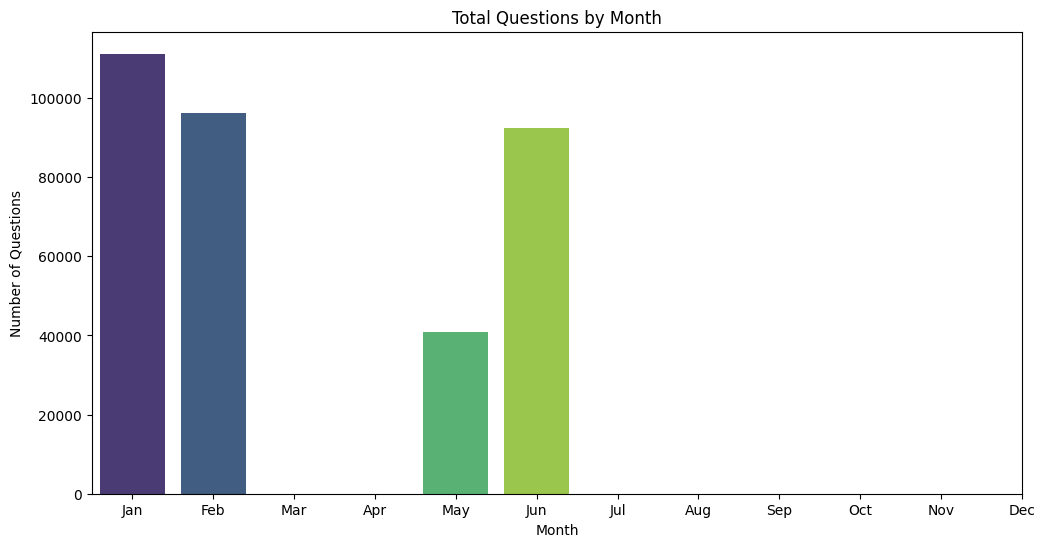

In [42]:
monthly_counts = data.groupby('month')['question_id'].count()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Total Questions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### 2. Circular Seasonality Plot
A polar plot helps visualize the cyclical nature of the data, highlighting peak seasons more intuitively.

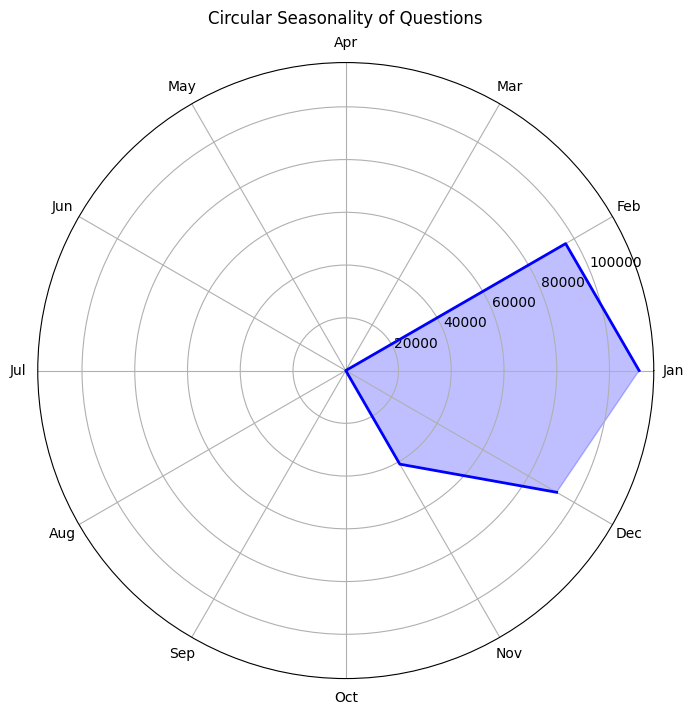

In [43]:
# Prepare data for polar plot
months = np.arange(1, 13)
counts = monthly_counts.reindex(months, fill_value=0).values

# Compute angles for the polar plot
theta = np.linspace(0, 2 * np.pi, len(months), endpoint=False)

# Create the plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, counts, color='b', linewidth=2)
ax.fill(theta, counts, color='b', alpha=0.25)

# Set labels
ax.set_xticks(theta)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title("Circular Seasonality of Questions", va='bottom')
plt.show()

### 3. Seasonality by Country
Farming seasons differ by region. Let's look at the monthly distribution for each country.

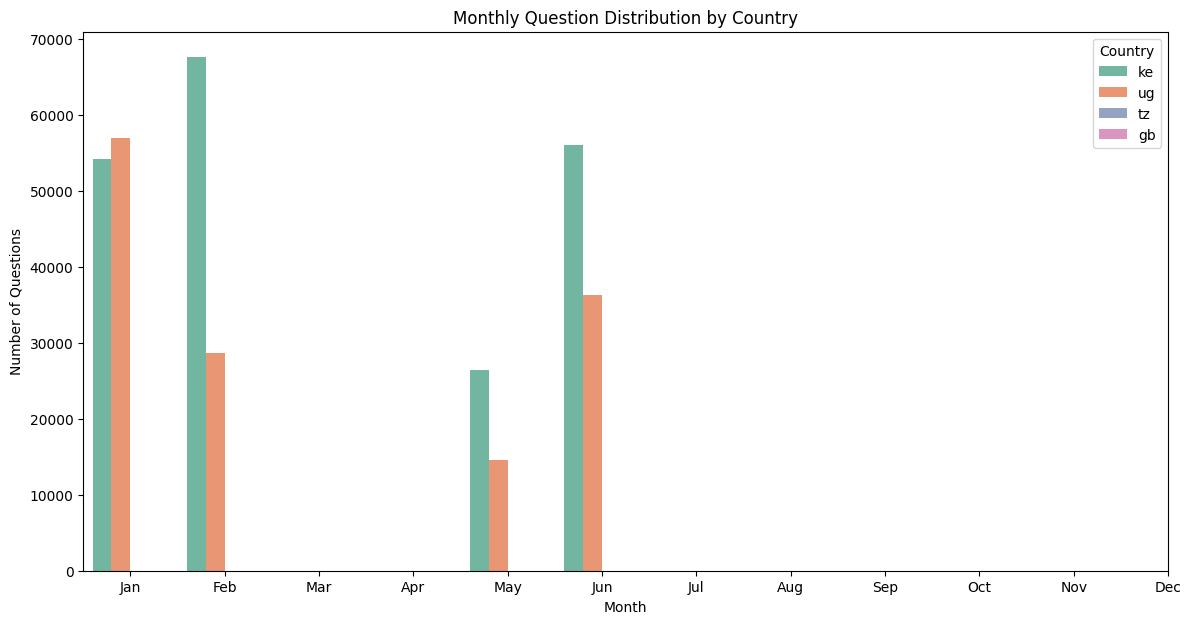

In [44]:
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='month', hue='question_user_country_code', palette='Set2')
plt.title('Monthly Question Distribution by Country')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.legend(title='Country')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### 4. Top Topics Seasonality
Let's identify the most common topics and see how they vary throughout the year.

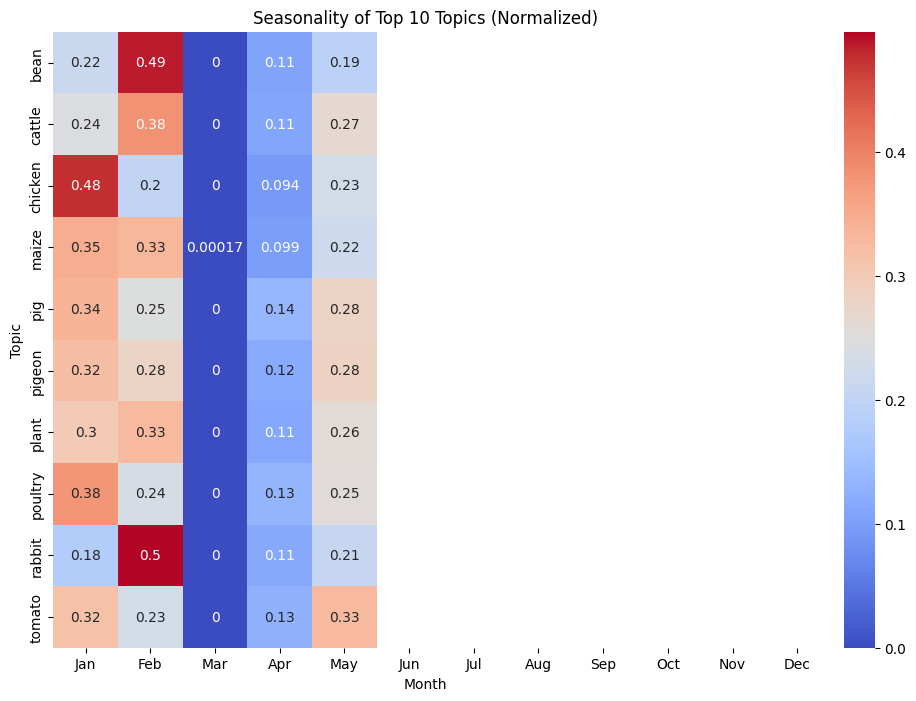

In [50]:
# Get top 10 topics
top_topics = data['question_topic'].value_counts().head(10).index

# Filter data for top topics
top_topics_data = data[data['question_topic'].isin(top_topics)]

# Create a pivot table for heatmap
topic_month_pivot = top_topics_data.groupby(['question_topic', 'month']).size().unstack(fill_value=0)

# Normalize by row (topic) to see peak months for each topic
topic_month_normalized = topic_month_pivot.div(topic_month_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(topic_month_normalized, cmap='coolwarm', annot=True)
plt.title('Seasonality of Top 10 Topics (Normalized)')
plt.xlabel('Month')
plt.ylabel('Topic')
plt.xticks(ticks=np.arange(0.5, 12.5), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### 5. Farming Calendar Inference
Can we map the farming calendar (planting, growing, harvesting) based on question data? We will track keywords related to these activities.

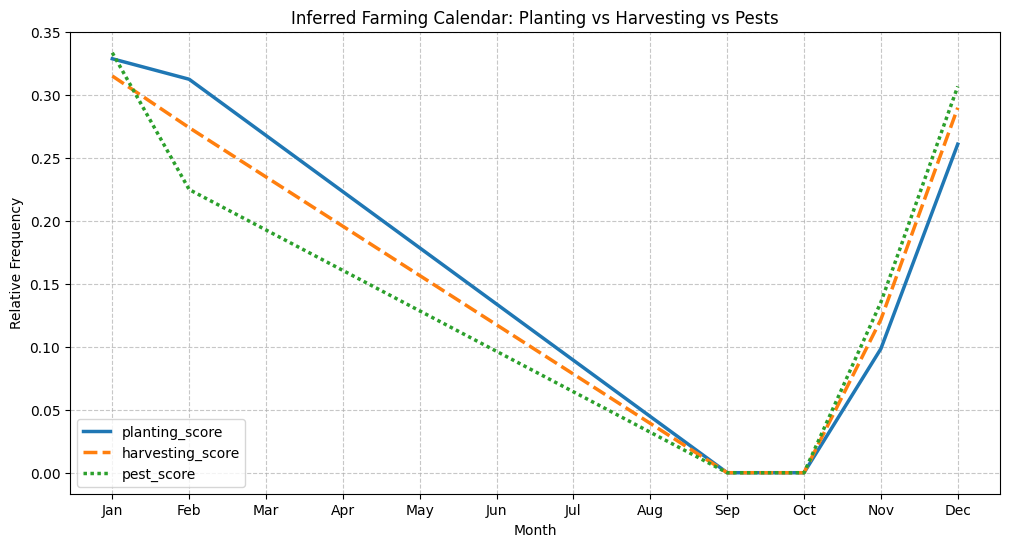

In [51]:
# Define keywords
planting_keywords = ['plant', 'sow', 'seed', 'seedling', 'germinate', 'planting']
harvesting_keywords = ['harvest', 'yield', 'pick', 'ripe', 'mature', 'selling', 'market']
pest_keywords = ['pest', 'disease', 'worm', 'insect', 'blight', 'attack']

def count_keywords(text, keywords):
    if not isinstance(text, str):
        return 0
    text = text.lower()
    return sum(1 for word in keywords if word in text)

# Sample data for speed if needed
calendar_data = data.sample(100000, random_state=42).copy()

calendar_data['planting_score'] = calendar_data['question_content'].apply(lambda x: count_keywords(x, planting_keywords))
calendar_data['harvesting_score'] = calendar_data['question_content'].apply(lambda x: count_keywords(x, harvesting_keywords))
calendar_data['pest_score'] = calendar_data['question_content'].apply(lambda x: count_keywords(x, pest_keywords))

# Group by month
monthly_activity = calendar_data.groupby('month')[['planting_score', 'harvesting_score', 'pest_score']].sum()

# Normalize to compare trends
monthly_activity_norm = monthly_activity / monthly_activity.sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_activity_norm, linewidth=2.5)
plt.title('Inferred Farming Calendar: Planting vs Harvesting vs Pests')
plt.xlabel('Month')
plt.ylabel('Relative Frequency')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 6. Light Machine Learning: Topic Modeling (LDA)
We will use Latent Dirichlet Allocation (LDA) to discover hidden topics, using a stronger list of stop words to improve quality.

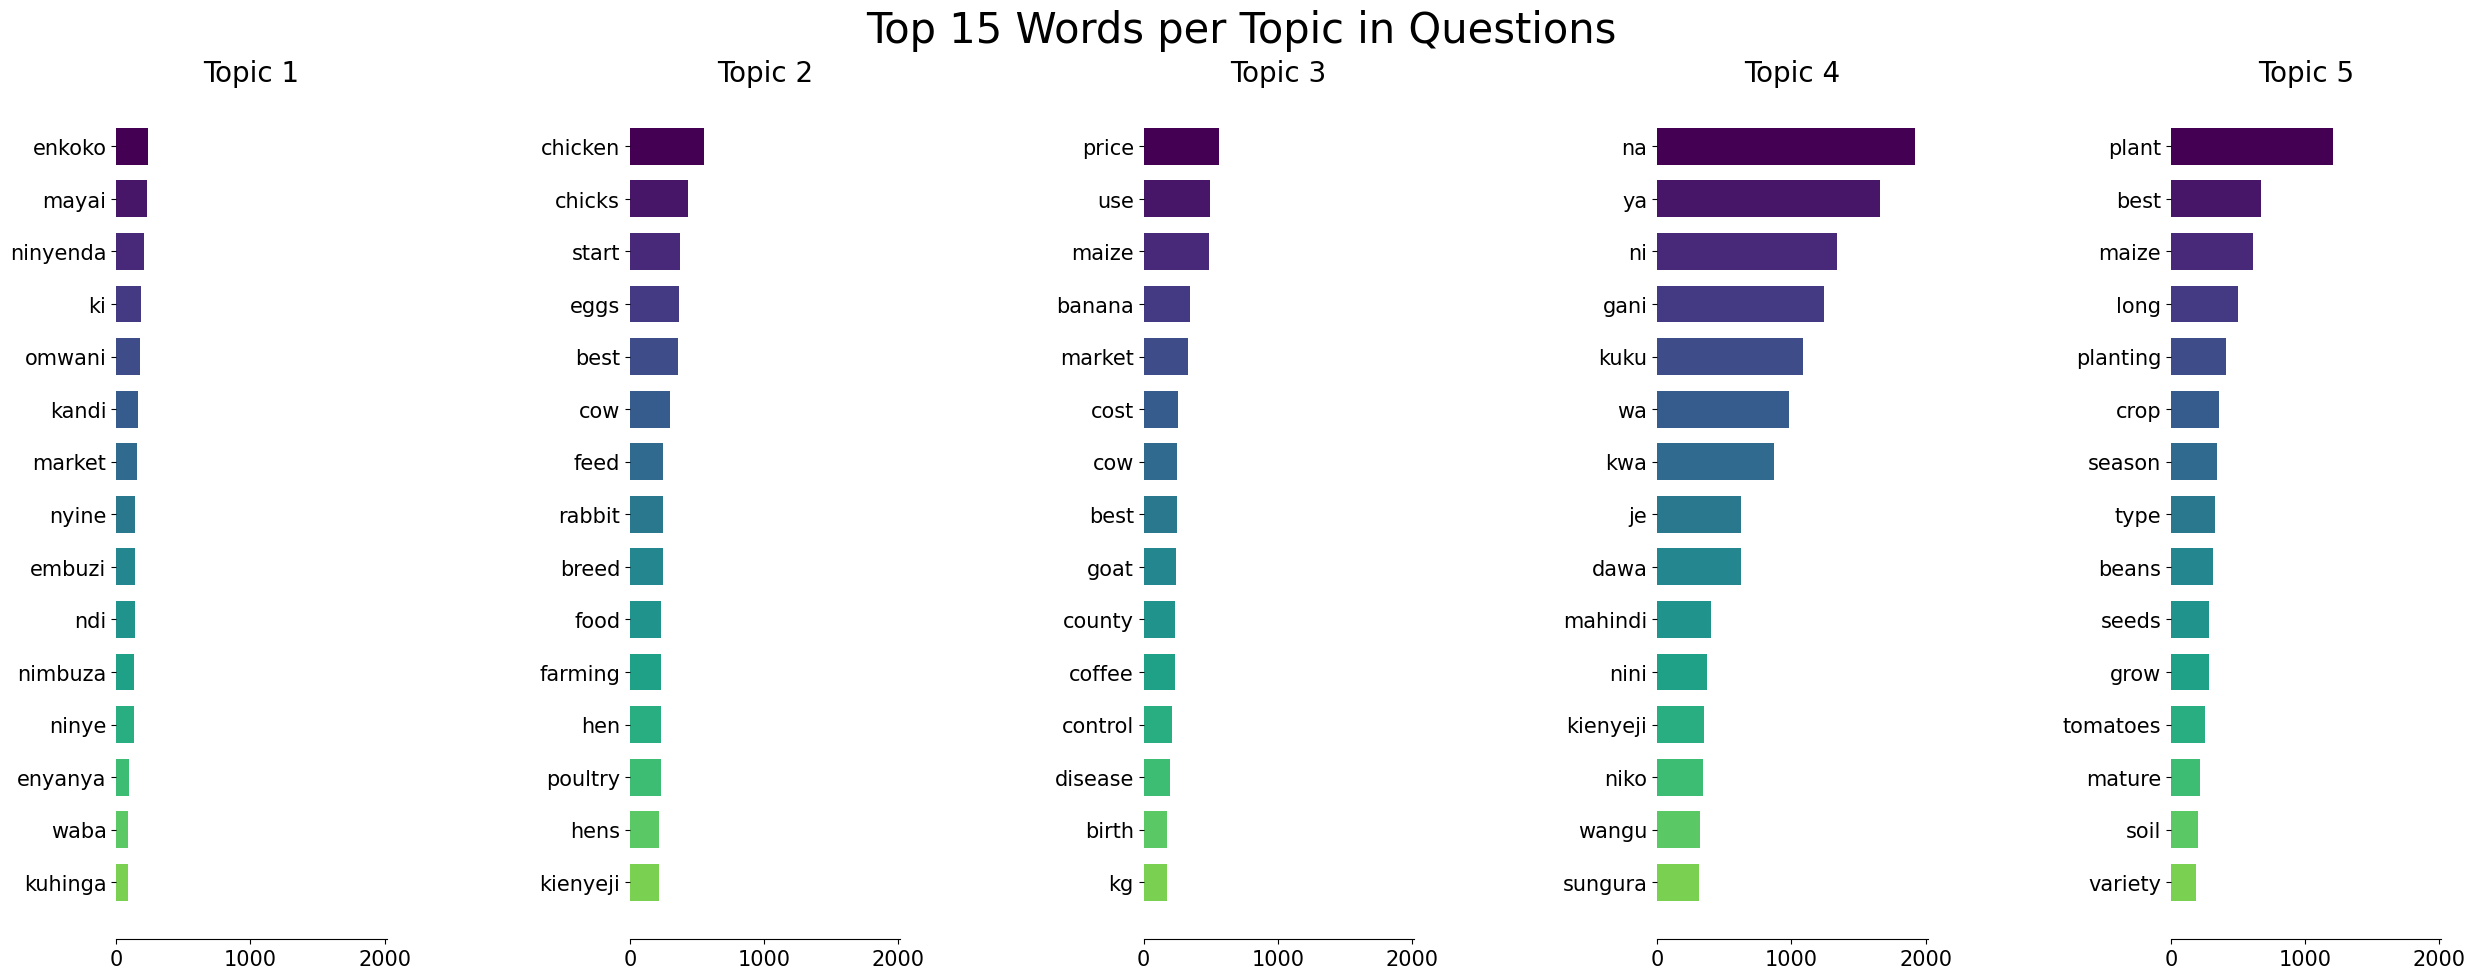

In [56]:
# Custom stronger stop words
custom_stop_words = [
    'the', 'is', 'to', 'in', 'and', 'of', 'a', 'for', 'on', 'i', 'my', 'it', 'have', 'are', 'me', 'can', 'you', 'what', 'how', 'do', 'help', 'please', 
    'question', 'answer', 'thanks', 'thank', 'wefarm', 'hello', 'hi', 'dear', 'sir', 'madam', 'good', 'morning', 'afternoon', 'evening', 
    'want', 'know', 'like', 'get', 'give', 'tell', 'ask', 'about', 'from', 'with', 'this', 'that', 'there', 'am', 'im', 'will', 'would', 'could', 'should',
    'where', 'does'
]

# add sklearn built in stop words for more robust filtering
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

# Sample data for faster processing
sample_data = data.sample(20000, random_state=42)

# Vectorize text
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words=custom_stop_words)
dtm = vectorizer.fit_transform(sample_data['question_content'].astype(str))

# Fit LDA model
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

# Visualize Top Words per Topic. Use nice colors
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 20})
        ax.invert_yaxis()
        # Set nice colors for bars
        colors = plt.cm.viridis(np.linspace(0, 1, n_top_words))
        ax.patches[0].set_facecolor(colors[0]) # This might not work as expected for multiple bars already plotted.
        
        # Let's try modifying the existing patches
        for patch, color in zip(ax.patches, plt.cm.viridis(np.linspace(0, 0.8, len(top_features)))):
            patch.set_facecolor(color)
        
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

tf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, 15, 'Top 15 Words per Topic in Questions')

### 7. Time Series Decomposition
To separate the overall growth trend from the seasonal fluctuations, we can decompose the time series.

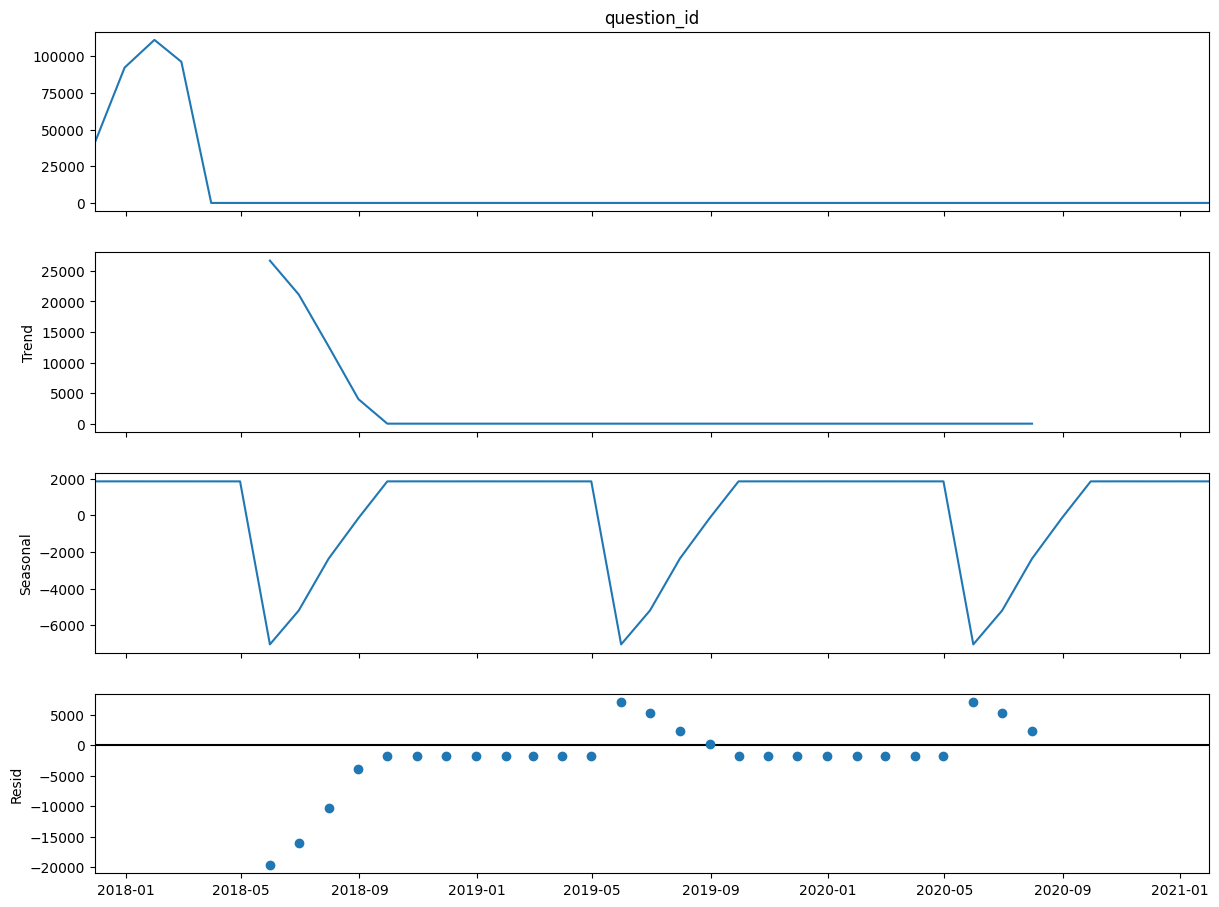

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to monthly frequency
monthly_series = data.set_index('question_sent').resample('M')['question_id'].count()

# Decompose
decomposition = seasonal_decompose(monthly_series, model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()